In [1]:
import qiskit as qk

/Users/kevin.krsulichibm.com/q/qiskit-terra/qiskit/__init__.py:78: DeprecationWarning: Using Qiskit with Python 3.5 is deprecated as of the 0.12.0 release. Support for running Qiskit with Python 3.5 will be removed at the Python 3.5 EoL on 09/13/2020.
  "Python 3.5 EoL on 09/13/2020.", DeprecationWarning)


In [2]:
from qiskit.circuit import ReglessQubit, ReglessClbit

In [3]:
qargs = [ReglessQubit() for _ in range(5)]
cargs = [ReglessClbit() for _ in range(1)]

In [4]:
qargs

[ReglessQubit(0x129a0e198),
 ReglessQubit(0x129a0ee80),
 ReglessQubit(0x129a0ef28),
 ReglessQubit(0x129a0eef0),
 ReglessQubit(0x129a0e4e0)]

In [5]:
cargs

[ReglessClbit(0x129a0e1d0)]

In [6]:
from qiskit.circuit import QuantumRegister, ClassicalRegister

In [7]:
qr = QuantumRegister(bits=qargs)
cr = ClassicalRegister(bits=cargs)

In [8]:
qr

QuantumRegister(5, 'q0')

In [9]:
cr

ClassicalRegister(1, 'c0')

In [10]:
qr[0]

ReglessQubit(0x129a0e198)

In [11]:
cr[0]

ReglessClbit(0x129a0e1d0)

In [12]:
qc = qk.QuantumCircuit(qr, cr)

In [13]:
qc.qubits

[ReglessQubit(0x129a0e198),
 ReglessQubit(0x129a0ee80),
 ReglessQubit(0x129a0ef28),
 ReglessQubit(0x129a0eef0),
 ReglessQubit(0x129a0e4e0)]

In [14]:
qc.clbits

[ReglessClbit(0x129a0e1d0)]

In [15]:
qc.qregs

{QuantumRegister(5, 'q0')}

In [16]:
qc.cregs

{ClassicalRegister(1, 'c0')}

In [17]:
qc.h(qr[0])

In [18]:
qc.h(0)

In [19]:
qc = qk.QuantumCircuit(5,3)

In [20]:
qc.qubits

[ReglessQubit(0x129a1f160),
 ReglessQubit(0x129a1f898),
 ReglessQubit(0x129a1fa58),
 ReglessQubit(0x129a1fb38),
 ReglessQubit(0x129a1f5c0)]

In [21]:
qc.clbits

[ReglessClbit(0x129a1f048),
 ReglessClbit(0x129a1fd68),
 ReglessClbit(0x129a1f9b0)]

In [22]:
qc.qregs

set()

In [23]:
qc.cregs

set()

In [24]:
qc.h(0)

In [25]:
qc.h(qc.qubits[0])

In [26]:
print(qc)

         ┌───┐┌───┐
Qubit 0: ┤ H ├┤ H ├
         └───┘└───┘
Qubit 1: ──────────
                   
Qubit 2: ──────────
                   
Qubit 3: ──────────
                   
Qubit 4: ──────────
                   
Clbit 0: ══════════
                   
Clbit 1: ══════════
                   
Clbit 2: ══════════
                   


In [27]:
dag = qk.converters.circuit_to_dag(qc)

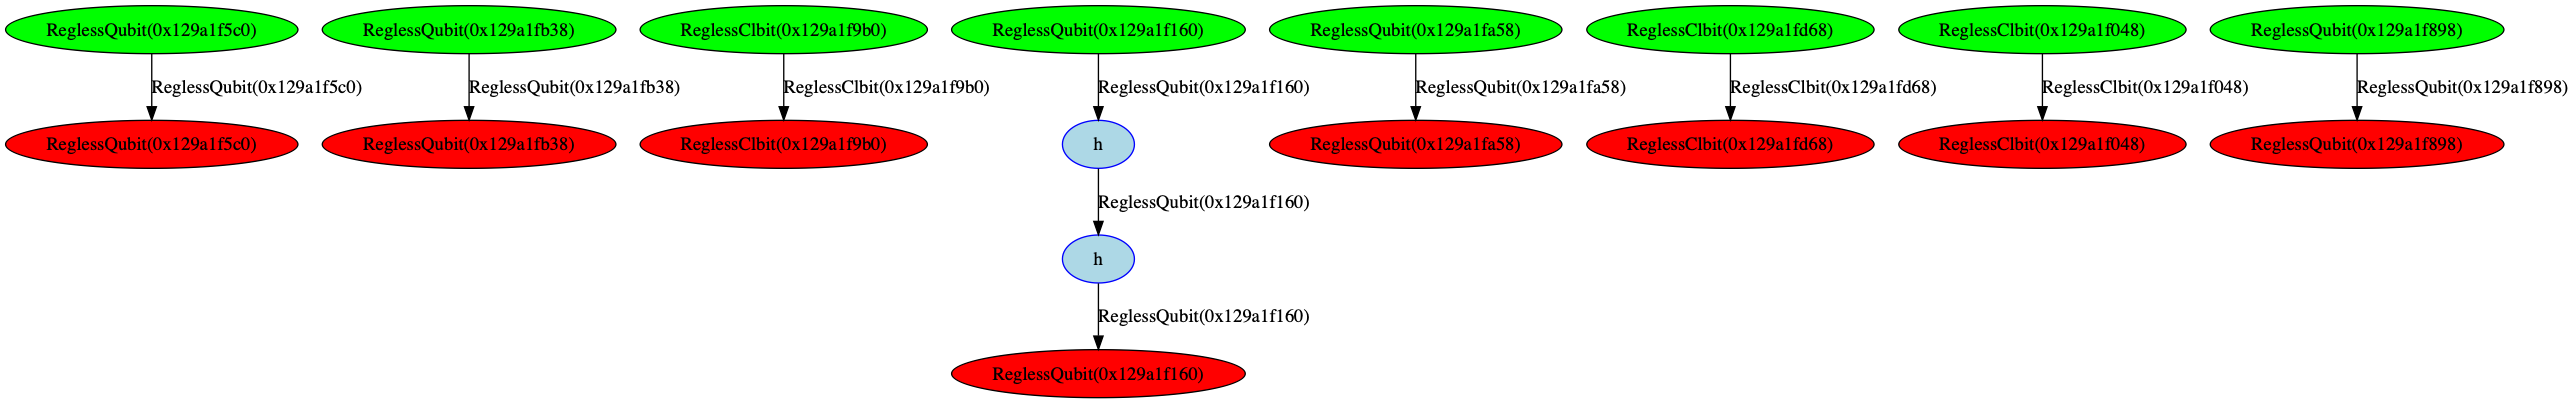

In [28]:
dag.draw()

In [29]:
list(dag.layers())

[{'graph': <qiskit.dagcircuit.dagcircuit.DAGCircuit at 0x127d9b198>,
  'partition': [[ReglessQubit(0x129a1f160)]]},
 {'graph': <qiskit.dagcircuit.dagcircuit.DAGCircuit at 0x127d9b278>,
  'partition': [[ReglessQubit(0x129a1f160)]]}]

In [30]:
qc.mark_registers((0,2,4), 'foo')

QuantumRegister(3, 'foo')

In [31]:
qc.qregs

{QuantumRegister(3, 'foo')}

In [32]:
list(qc.qregs)[0][:]

[ReglessQubit(0x129a1f160),
 ReglessQubit(0x129a1fa58),
 ReglessQubit(0x129a1f5c0)]

In [33]:
qc.mark_registers([qc.qubits[1], qc.qubits[3]], name='bar')

QuantumRegister(2, 'bar')

In [34]:
qc.qregs

{QuantumRegister(2, 'bar'), QuantumRegister(3, 'foo')}

In [35]:
h_broad = qk.QuantumCircuit(5, name='h_layer')
h_broad.h(h_broad.qubits[0])
print(h_broad)

         ┌───┐
Qubit 0: ┤ H ├
         └───┘
Qubit 1: ─────
              
Qubit 2: ─────
              
Qubit 3: ─────
              
Qubit 4: ─────
              


In [36]:
cx_tile = qk.QuantumCircuit(5, name='cx_layer')
for i in range(4):
    cx_tile.cx(i, i+1)
print(cx_tile)

                             
Qubit 0: ──■─────────────────
         ┌─┴─┐               
Qubit 1: ┤ X ├──■────────────
         └───┘┌─┴─┐          
Qubit 2: ─────┤ X ├──■───────
              └───┘┌─┴─┐     
Qubit 3: ──────────┤ X ├──■──
                   └───┘┌─┴─┐
Qubit 4: ───────────────┤ X ├
                        └───┘


In [37]:
th = qk.circuit.Parameter('theta')
qc = qk.QuantumCircuit(5,1)
qc.append(h_broad, range(5))

In [38]:
print(qc)

         ┌──────────┐
Qubit 0: ┤0         ├
         │          │
Qubit 1: ┤1         ├
         │          │
Qubit 2: ┤2 H_layer ├
         │          │
Qubit 3: ┤3         ├
         │          │
Qubit 4: ┤4         ├
         └──────────┘
Clbit 0: ════════════
                     


In [39]:
qc.append(cx_tile, [0,1,2,3,4])

In [40]:
qc.rz(th, qc.qubits)

In [41]:
qc.append(cx_tile.mirror(), [0,1,2,3,4])

In [42]:
print(qc)

         ┌──────────┐┌───────────┐┌───────────┐┌──────────────────┐
Qubit 0: ┤0         ├┤0          ├┤ Rz(theta) ├┤0                 ├
         │          ││           │├───────────┤│                  │
Qubit 1: ┤1         ├┤1          ├┤ Rz(theta) ├┤1                 ├
         │          ││           │├───────────┤│                  │
Qubit 2: ┤2 H_layer ├┤2 Cx_layer ├┤ Rz(theta) ├┤2 Cx_layer_mirror ├
         │          ││           │├───────────┤│                  │
Qubit 3: ┤3         ├┤3          ├┤ Rz(theta) ├┤3                 ├
         │          ││           │├───────────┤│                  │
Qubit 4: ┤4         ├┤4          ├┤ Rz(theta) ├┤4                 ├
         └──────────┘└───────────┘└───────────┘└──────────────────┘
Clbit 0: ══════════════════════════════════════════════════════════
                                                                   


In [43]:
print(qc.decompose())

         ┌───┐     ┌───────────┐                                            »
Qubit 0: ┤ H ├──■──┤ U1(theta) ├────────────────────────────────────────────»
         └───┘┌─┴─┐└───────────┘┌───────────┐                               »
Qubit 1: ─────┤ X ├──────■──────┤ U1(theta) ├───────────────────────────────»
              └───┘    ┌─┴─┐    └───────────┘┌───────────┐                  »
Qubit 2: ──────────────┤ X ├──────────■──────┤ U1(theta) ├──────────────────»
                       └───┘        ┌─┴─┐    └───────────┘┌───────────┐     »
Qubit 3: ───────────────────────────┤ X ├──────────■──────┤ U1(theta) ├──■──»
                                    └───┘        ┌─┴─┐    ├───────────┤┌─┴─┐»
Qubit 4: ────────────────────────────────────────┤ X ├────┤ U1(theta) ├┤ X ├»
                                                 └───┘    └───────────┘└───┘»
Clbit 0: ═══════════════════════════════════════════════════════════════════»
                                                                